In [3]:
import pathlib
import platform
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from segysak.segy import segy_header_scan, segy_header_scrape, get_segy_texthead
import xarray as xr

import bruges as bg

In [2]:
# !pip install bruges

  Using cached bruges-0.5.4-py3-none-any.whl.metadata (3.1 kB)
Using cached bruges-0.5.4-py3-none-any.whl (94 kB)


In [5]:
st0202_path = pathlib.Path("ST0202.segy")
print("3D", st0202_path, st0202_path.exists())

st10010_path = pathlib.Path("ST10010.segy")
print("3D", st10010_path, st10010_path.exists())

3D ST0202.segy True
3D ST10010.segy True


In [6]:
get_segy_texthead(st0202_path)

Text HeaderC01 CLIENT : STATOIL                              PROCESSED BY: WESTERNGECO     
C02 AREA   : VOLVE, BLOCK 15/9,  NORTH SEA - ST0202      SURVEY: 3D 4C 0BC      
C03 4D POST-STACK FINAL PSDM                     DATE: 2012-03-30               
C04 DATA FORMAT: SEGY       DATA TYPE: STACK-FULL ANGLE, 3-41 DEGREES (T)       
C05 ---------------------AQUISITION PARAMETRS---------------------------------- 
C06 DATA SHOT BY VESSEL: M/V GECO ANGLER & WESTERN INLET  CABLE LENGTH:6100 M   
C07 NO OF GROUPS: 960/P,X,Y,Z.  NO OF CABLES: 2  ARRAY VOL/SOURCE: 2250 CU IN.  
C08 GROUP INTERVAL: 25M     SHOT INTERVAL: 25M (FLIP-FLOP)                      
C09 GEODECTIC DATUM:  ED50      SPHEROID: INTERNAT 1924.     PROJECTION: UTM    
C10 UTM ZONE: 31 N                                                              
C11 RECORD LENGTH: 10000 MS     SAMPLE INTERVAL: 2 MS                           
C12 NAVIGATION SOURCE P1/90 UKOOA, SPS                                          
C13 ----------------------PROCESSING SEQUENCE---------------------------------- 
C14 REFORMAT, RESAMPLING TO 4MS, NAV/SEISMIC DATA MERGE                         
C15 Z TO P AMP. MATCH & DESIGNATURE,TIDAL STATIC CORRECTION, NOISE ATTENUATION  
C16 PZ CALIBRATION & SUMMATION, DIRECT ARRIVAL REMOVAL (SHOT & RECEIVER DOMAIN) 
C17 LINEAR NOISE ATTENUATION (RECEIVER DOMAIN),                                 
C18 SELECTIVE RANDOM NOISE ATTENUATION (SHOT DOMAIN)                            
C19 LOW VELOCITY COHERENT NOISE MODEL AND SUBTRACTION                           
C20 5HZ LOW CUT FILTER, GLOBAL DEBUBBLE OPERATOR APPLIED                        
C21 SINGLE BOUNCE DECON IN TAU-P DOMAIN AND DWD MULTIPLE MODEL AND SUBTRACTION  
C22 OFFSET REGULARIZATION, TIME LAPSE BINNING, TRACE BORROWING, PrSDM           
C23 DEPTH TO TIME CONVERSION, RESIDUAL VELOCITY ESTIMATION AND APPLICATION      
C24 ANGLE MUTE (3-41 DEGREES), STACK,  INVERSE_Q (100)                          
C25 RANDOM NOISE ATTENUATION, BPF 5Hz 18dB/OCT LOW-CUT                          
C26 12.5X12.5 INTERPOLATION, OUTPUT SEGY FORMAT                                 
C27 ----------------------DATA LENGTH AND SAMPLING-------------------------     
C28 FIRST SAMPLE: 4 MS     LAST SAMPLE: 3400 MS     SAMPLE INTERVAL: 4 MS       
C29 ----------------------PROCESSING GRID INFORMATION-------------------------  
C30 INLINE  BIN SIZE: 12.5M   CROSSLINE BIN SIZE: 12.5M  AZIMUTH: 284 DEGREES   
C31 INLINE NUMBER INCREMENT:1       CROSSLINE  NUMBER INCREMENT:1               
C32 PG1   X: 439272.97   Y: 6475068.89   IL:   9961   XL: 1881                  
C33 PG2   X: 429582.21   Y: 6477485.37   IL:   9961   XL: 2680                  
C34 PG3   X: 440588.57   Y: 6480344.84   IL:  10396   XL: 1881                  
C35 PG4   X: 430897.81   Y: 6482761.32   IL:  10396   XL: 2680                  
C36 ----------------------HEADER WORD POSITIONS-------------------------------- 
C37 CMP  BYTES 21-24 ¦ 3D INLINE  BYTES 189-192 ¦ 3D CROSS LINE  BYTES 193-196  
C38 BIN CENTRE UTM-X  BYTES 181-184.  ¦  BIN CENTRE UTM-Y  BYTES 185-188        
C39 ALL COORDINATE VALUES ARE MULTIPLIED BY 100                                 
C40 END EBCDIC

In [7]:
scan = segy_header_scan(st0202_path)

with pd.option_context("display.max_rows", 100, "display.max_columns", 10):
    # drop byte locations where the mean is zero, these are likely empty.
    display(scan)

Processing Chunks:   0%|          | 0.00/1.00 [00:00<?, ? trace-chunks/s]

Reading header:   0%|          | 0.00/1.00k [00:00<?, ? traces/s]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,5.005000e+02,2.888194e+02,1.000000e+00,2.507500e+02,5.005000e+02,7.502500e+02,1.000000e+03
TRACE_SEQUENCE_FILE,5,1000.0,5.005000e+02,2.888194e+02,1.000000e+00,2.507500e+02,5.005000e+02,7.502500e+02,1.000000e+03
FieldRecord,9,1000.0,5.043210e+02,2.908288e+02,3.000000e+00,2.527500e+02,5.025000e+02,7.572500e+02,1.007000e+03
TraceNumber,13,1000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
EnergySourcePoint,17,1000.0,2.230997e+03,1.725388e+02,1.963000e+03,2.087750e+03,2.212500e+03,2.348250e+03,2.599000e+03
CDP,21,1000.0,6.421970e+02,3.572873e+02,8.300000e+01,3.327500e+02,5.825000e+02,9.962500e+02,1.246000e+03
CDP_TRACE,25,1000.0,2.689960e+02,1.725367e+02,1.000000e+00,1.257500e+02,2.505000e+02,3.862500e+02,6.360000e+02
TraceIdentificationCode,29,1000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
NSummedTraces,31,1000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
NStackedTraces,33,1000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
scan[scan["mean"] > 0]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,5.005000e+02,2.888194e+02,1.000000e+00,2.507500e+02,5.005000e+02,7.502500e+02,1.000000e+03
TRACE_SEQUENCE_FILE,5,1000.0,5.005000e+02,2.888194e+02,1.000000e+00,2.507500e+02,5.005000e+02,7.502500e+02,1.000000e+03
FieldRecord,9,1000.0,5.043210e+02,2.908288e+02,3.000000e+00,2.527500e+02,5.025000e+02,7.572500e+02,1.007000e+03
TraceNumber,13,1000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
EnergySourcePoint,17,1000.0,2.230997e+03,1.725388e+02,1.963000e+03,2.087750e+03,2.212500e+03,2.348250e+03,2.599000e+03
CDP,21,1000.0,6.421970e+02,3.572873e+02,8.300000e+01,3.327500e+02,5.825000e+02,9.962500e+02,1.246000e+03
CDP_TRACE,25,1000.0,2.689960e+02,1.725367e+02,1.000000e+00,1.257500e+02,2.505000e+02,3.862500e+02,6.360000e+02
TraceIdentificationCode,29,1000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
NSummedTraces,31,1000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
NStackedTraces,33,1000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [22]:
scrape = segy_header_scrape(st0202_path)#, partial_scan=10000)
scrape

Processing Chunks:   0%|          | 0.00/3.00 [00:00<?, ? trace-chunks/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/56.6k [00:00<?, ? traces/s]

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2
0,1,1,3,1,1963,83,1,1,1,1,...,0,3,18501,1212481536,83,0,0,0,0,0
1,2,2,4,1,1964,84,2,1,1,1,...,0,4,18502,1212547072,84,0,0,0,0,0
2,3,3,5,1,1965,85,3,1,1,1,...,0,5,18503,1212612608,85,0,0,0,0,0
3,4,4,6,1,1966,86,4,1,1,1,...,0,6,18504,1212678144,86,0,0,0,0,0
4,5,5,7,1,1967,87,5,1,1,1,...,0,7,18505,1212743680,87,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256609,256610,256610,257036,1,2596,320716,636,1,1,1,...,3,-5108,32767,2147418112,32767,0,0,0,0,0
256610,256611,256611,257037,1,2597,320717,637,1,1,1,...,3,-5107,32767,2147418112,32767,0,0,0,0,0
256611,256612,256612,257038,1,2598,320718,638,1,1,1,...,3,-5106,32767,2147418112,32767,0,0,0,0,0
256612,256613,256613,257039,1,2599,320719,639,1,1,1,...,3,-5105,32767,2147418112,32767,0,0,0,0,0


In [24]:
scrape = scrape[scan[scan["std"] > 0].index]
scrape

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,EnergySourcePoint,CDP,CDP_TRACE,CDP_X,CDP_Y,INLINE_3D,CROSSLINE_3D,ShotPoint,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent
0,1,1,3,1963,83,1,43827841,647531682,9961,1963,652804096,3,18501,1212481536,83
1,2,2,4,1964,84,2,43826629,647531984,9961,1964,652804096,4,18502,1212547072,84
2,3,3,5,1965,85,3,43825416,647532286,9961,1965,652804096,5,18503,1212612608,85
3,4,4,6,1966,86,4,43824203,647532589,9961,1966,652804096,6,18504,1212678144,86
4,5,5,7,1967,87,5,43822990,647532891,9961,1967,652804096,7,18505,1212743680,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256609,256610,256610,257036,2596,320716,636,43181082,648208289,10361,2596,679018496,-5108,32767,2147418112,32767
256610,256611,256611,257037,2597,320717,637,43179870,648208591,10361,2597,679018496,-5107,32767,2147418112,32767
256611,256612,256612,257038,2598,320718,638,43178657,648208894,10361,2598,679018496,-5106,32767,2147418112,32767
256612,256613,256613,257039,2599,320719,639,43177444,648209196,10361,2599,679018496,-5105,32767,2147418112,32767


In [67]:
# # scrape[["CDP_X", "CDP_Y"]]
# print(scrape.CDP_X.min(), scrape.CDP_X.max(), scrape.CDP_Y.min(), scrape.CDP_Y.max())
# print()
# print("lower left", scrape.CDP_X.min(), scrape.CDP_Y.min())
# print("lower right", scrape.CDP_X.max(), scrape.CDP_Y.min())
# print("upper right", scrape.CDP_X.max(), scrape.CDP_Y.max())
# print("upper left", scrape.CDP_X.min(), scrape.CDP_Y.max())
# print("lower left", scrape.CDP_X.min(), scrape.CDP_Y.min())

corners = np.array([[scrape.CDP_X.min(), scrape.CDP_Y.min()],
                    [scrape.CDP_X.max(), scrape.CDP_Y.min()],
                    [scrape.CDP_X.max(), scrape.CDP_Y.max()],
                    [scrape.CDP_X.min(), scrape.CDP_Y.max()],
                   [scrape.CDP_X.min(), scrape.CDP_Y.min()]])
corners = corners/100
corners

array([[ 430558.51, 6475316.82],
       [ 439512.48, 6475316.82],
       [ 439512.48, 6482094.99],
       [ 430558.51, 6482094.99],
       [ 430558.51, 6475316.82]])

In [63]:
cp = vol.segysak.calc_corner_points()
corners = np.array(cp)
corners

array([[       nan,        nan],
       [       nan,        nan],
       [ 431762.31, 6482094.99],
       [ 439512.48, 6480162.23],
       [       nan,        nan]])

In [25]:
import matplotlib.pyplot as plt

%matplotlib inline

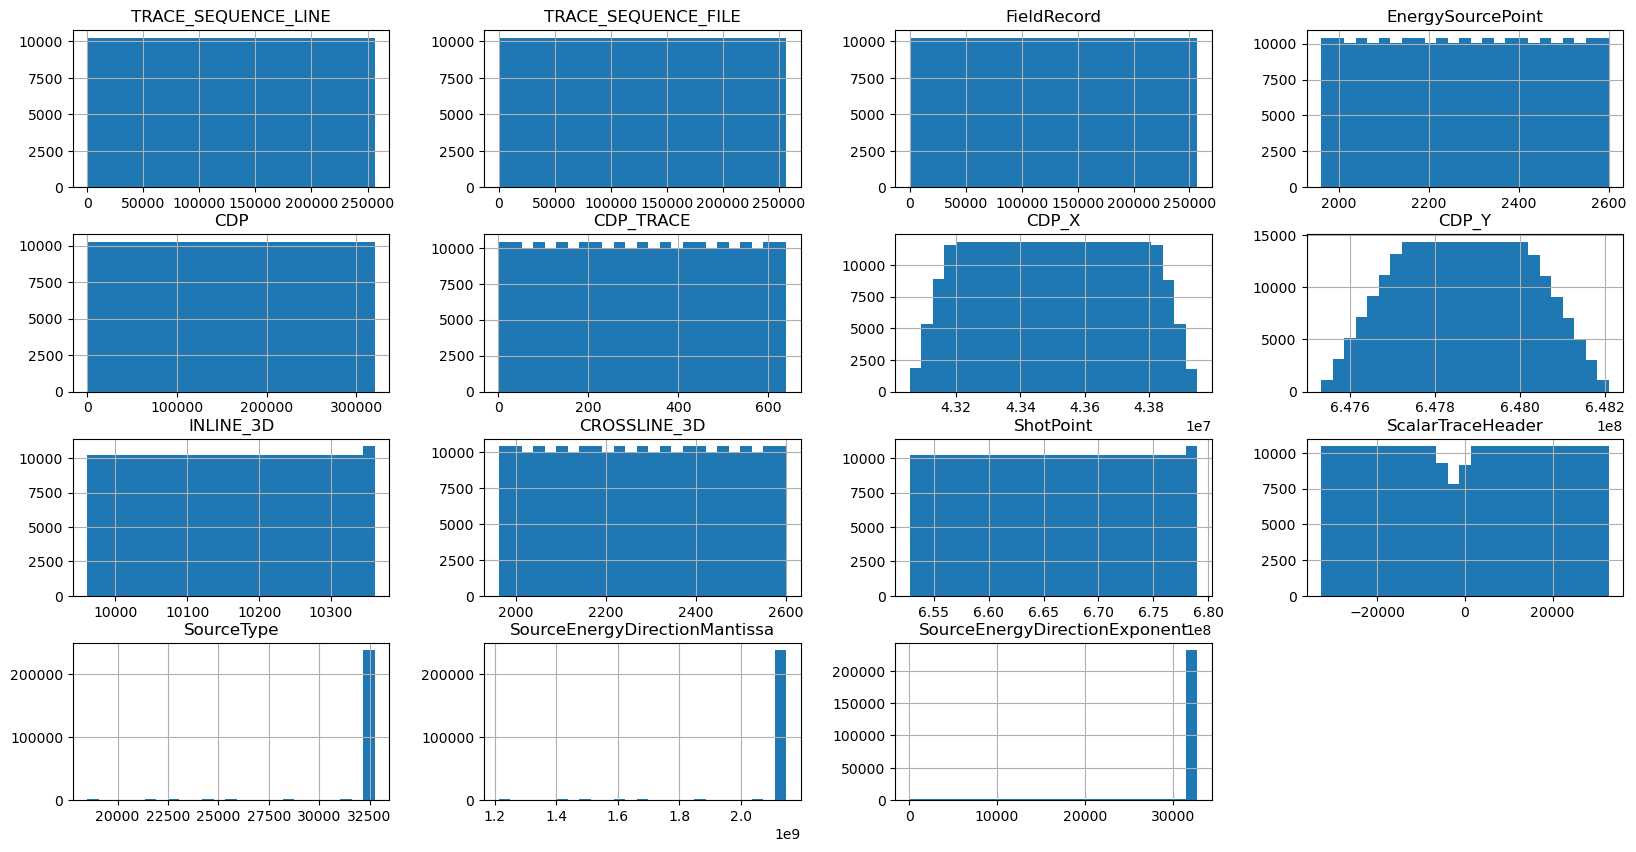

In [26]:
plot = scrape.hist(bins=25, figsize=(20, 10))

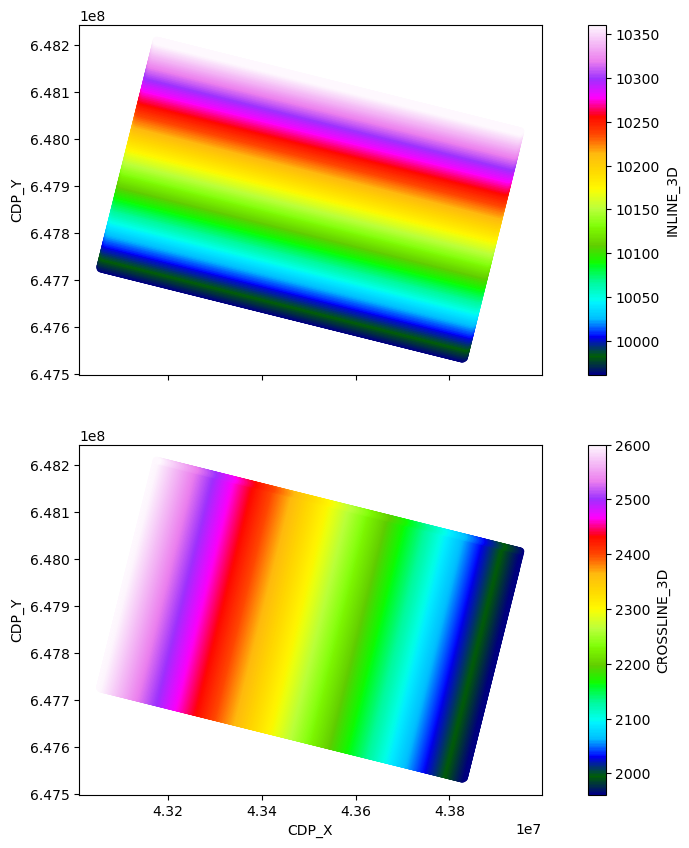

In [27]:
fig, axs = plt.subplots(nrows=2, figsize=(12, 10), sharex=True, sharey=True)

scrape.plot(
    kind="scatter", x="CDP_X", y="CDP_Y", c="INLINE_3D", ax=axs[0], cmap="gist_ncar"
)
scrape.plot(
    kind="scatter", x="CDP_X", y="CDP_Y", c="CROSSLINE_3D", ax=axs[1], cmap="gist_ncar"
)
for aa in axs:
    aa.set_aspect("equal", "box")

In [45]:
import segyio

In [46]:
f = segyio.open(st0202_path, ignore_geometry = True)

In [47]:
with segyio.open(st0202_path) as segyf:
    n_traces = segyf.tracecount
    sample_rate = segyio.tools.dt(segyf)
    n_samples = segyf.samples.size
    n_il = len(segyf.iline)

ValueError: Inlines inconsistent, expect all inlines to be unique

In [48]:
inlines = []
crosslines = []
for h in f.header:
    inlines.append(h[segyio.su.iline])
    crosslines.append(h[segyio.su.xline])
        
# print(f'{ntraces} traces')
# print(f'first 10 inlines: {inlines[:10]}')
# print(f'first 10 crosslines: {crosslines[:10]}')

In [51]:
import itertools
uniqil = set(inlines)
uniqxl = set(crosslines)
real = set(zip(inlines, crosslines))
grid = set(itertools.product(uniqil, uniqxl))

In [52]:
ils = sorted(uniqil)
xls = sorted(uniqxl)
lineindex = {
    (il, xl): i
    for i, (il, xl) in enumerate(sorted(grid))

}
lineindex

{(9961, 1961): 0,
 (9961, 1962): 1,
 (9961, 1963): 2,
 (9961, 1964): 3,
 (9961, 1965): 4,
 (9961, 1966): 5,
 (9961, 1967): 6,
 (9961, 1968): 7,
 (9961, 1969): 8,
 (9961, 1970): 9,
 (9961, 1971): 10,
 (9961, 1972): 11,
 (9961, 1973): 12,
 (9961, 1974): 13,
 (9961, 1975): 14,
 (9961, 1976): 15,
 (9961, 1977): 16,
 (9961, 1978): 17,
 (9961, 1979): 18,
 (9961, 1980): 19,
 (9961, 1981): 20,
 (9961, 1982): 21,
 (9961, 1983): 22,
 (9961, 1984): 23,
 (9961, 1985): 24,
 (9961, 1986): 25,
 (9961, 1987): 26,
 (9961, 1988): 27,
 (9961, 1989): 28,
 (9961, 1990): 29,
 (9961, 1991): 30,
 (9961, 1992): 31,
 (9961, 1993): 32,
 (9961, 1994): 33,
 (9961, 1995): 34,
 (9961, 1996): 35,
 (9961, 1997): 36,
 (9961, 1998): 37,
 (9961, 1999): 38,
 (9961, 2000): 39,
 (9961, 2001): 40,
 (9961, 2002): 41,
 (9961, 2003): 42,
 (9961, 2004): 43,
 (9961, 2005): 44,
 (9961, 2006): 45,
 (9961, 2007): 46,
 (9961, 2008): 47,
 (9961, 2009): 48,
 (9961, 2010): 49,
 (9961, 2011): 50,
 (9961, 2012): 51,
 (9961, 2013): 52,
 (9

In [53]:
d = np.zeros((len(ils), len(xls), len(f.samples)))
lineard = d.reshape(d.shape[0] * d.shape[1], d.shape[2])
for il, xl, trace in zip(inlines, crosslines, f.trace[:]):
    lineard[lineindex[il, xl]][:] = trace[:]

In [54]:
d.shape

(401, 640, 850)

In [56]:
# Set up some aliases
ilines = np.array(sorted(uniqil))
xlines = np.array(sorted(uniqxl))
t = np.array(f.samples)

In [57]:
#Create a Data Array
da = xr.DataArray(data = d,
                  dims = ['il','xl','twt'],
                  coords = {'il': ilines,
                          'xl': xlines,
                          'twt': t})
da

<xarray.DataArray (il: 401, xl: 640, twt: 850)> Size: 2GB
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-7.98719725e-07, -1.29252662e-08, -4.26842576e-07, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.11241752e-06,  1.77797439e-08, -5.20629499e-07, ...,
          4.05883417e-03,  6.52093813e-03,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.31961133e-06,  2.79510743e-07, -5.98793861e-07, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
          8.32594559e-03,  7.72155449e-03,  0.00000000e+00],
        [-4.04515322e-06, -9.60539182e-07, -2.15087857e-06, ...,
          8.75570625e-03,  8.88131931e-03,  0.00000000e+00],
        [-2.39406381e-06, -8.05759782e-07, -1.34904531e-06, ...,
          6.95621222e-03,  7.19533488e-03,  0.00000000e+00]],

       [[-3.77703509e-06,  3.14322006e-06, -3.29862758e-07, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-6.81674010e-06,  5.13844134e-06, -6.66137908e-07, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-7.06574519e-06,  5.46828414e-06, -7.89043725e-07, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [-5.40037763e-06, -1.95646578e-07, -2.35740026e-06, ...,
          6.63380697e-03,  7.01416284e-03,  0.00000000e+00],
        [-3.16261594e-06, -8.11676443e-07, -1.65245183e-06, ...,
          7.52638653e-03,  8.00298154e-03,  0.00000000e+00],
        [-1.87396290e-06, -6.54831297e-07, -1.02187187e-06, ...,
          6.05285913e-03,  6.39704987e-03,  0.00000000e+00]]],
      shape=(401, 640, 850))
Coordinates:
  * il       (il) int64 3kB 9961 9962 9963 9964 9965 ... 10358 10359 10360 10361
  * xl       (xl) int64 5kB 1961 1962 1963 1964 1965 ... 2597 2598 2599 2600
  * twt      (twt) float64 7kB 12.0 16.0 20.0 ... 3.4e+03 3.404e+03 3.408e+03

In [58]:
# Add some attribute information to the datarray
da.attrs['Year'] = '2002'
da.attrs['Type'] = 'Final PSDM time converted'

# Create a dataset
volve_ds = da.to_dataset(name = 'base')

# Add some attribute information to the dataset
volve_ds.attrs['Country'] = 'Norway'
volve_ds.attrs['Field'] = 'Volve'

# Take a look
volve_ds

<xarray.Dataset> Size: 2GB
Dimensions:  (il: 401, xl: 640, twt: 850)
Coordinates:
  * il       (il) int64 3kB 9961 9962 9963 9964 9965 ... 10358 10359 10360 10361
  * xl       (xl) int64 5kB 1961 1962 1963 1964 1965 ... 2597 2598 2599 2600
  * twt      (twt) float64 7kB 12.0 16.0 20.0 ... 3.4e+03 3.404e+03 3.408e+03
Data variables:
    base     (il, xl, twt) float64 2GB 0.0 0.0 0.0 0.0 ... 0.006053 0.006397 0.0
Attributes:
    Country:  Norway
    Field:    Volve

In [ ]:
# Estimate the amplitude range to use for the plots by taking the 95th percentile

vm = np.percentile(d, 95)
print(vm)

In [ ]:
st0202 = xr.open_dataset(
    st0202_path,
    dim_byte_fields={"iline": 189, "xline": 193},
    extra_byte_fields={"cdp_x": 181, "cdp_y": 185},
)

st0202 = st0202.rename_vars({'data' : 'Base'})
# st0202

st10010 = xr.open_dataset(
    st10010_path,
    dim_byte_fields={"iline": 189, "xline": 193},
    extra_byte_fields={"cdp_x": 181, "cdp_y": 185},
)
st10010 = st10010.rename_vars({'data' : 'Monitor'})
# st10010

In [ ]:
vol = xr.merge([st0202, st10010])#, compat='override')
# vol

vol = vol.assign_coords({"samples": vol.samples.astype(np.int16)})
# vol

vol = vol.set_coords(("cdp_x", "cdp_y"))
# vol

vol = vol.assign_coords({"cdp_x" : vol.cdp_x / 100, "cdp_y" : vol.cdp_y / 100})
# vol

In [12]:
# for grp, subds in vol.groupby("trace"):
#     print(grp)
#     print(subds)
#     break

# # dimension reduction.  can take 1 or more traces at a time...

In [13]:
# vol.to_netcdf("Seismic/volume.seisnc")

# or

# vol.seisio.to_segy(
#     "Seismic/volume.segy",
#     trace_header_map={'cdp_x' : 73, "cdp_y" : 77},
#     iline=189,
#     xline=193,
# )

In [41]:
hrz_file = pathlib.Path("hor_twt_hugin_fm_top.dat")
hrz = pd.read_csv(hrz_file, names=["cdp_x", "cdp_y", "twt"], sep=r'\s+', engine='python')
hrz.head()

,cdp_x,cdp_y,twt
0,432186.713151,6.477029e+06,2776.275147
1,432189.737524,6.477041e+06,2779.657715
2,432192.761898,6.477053e+06,2780.465088
3,432195.786271,6.477066e+06,2780.949951
4,432198.810645,6.477078e+06,2781.769775


In [42]:
cp = vol.segysak.calc_corner_points()
corners = np.array(cp)
corners

array([[       nan,        nan],
       [       nan,        nan],
       [ 431762.31, 6482094.99],
       [ 439512.48, 6480162.23],
       [       nan,        nan]])

In [43]:
from scipy.interpolate import griddata

xi = np.linspace(hrz.cdp_x.min(), hrz.cdp_x.max(), 250)
yi = np.linspace(hrz.cdp_y.min(), hrz.cdp_y.max(), 250)
X, Y = np.meshgrid(xi, yi)
Z = griddata((hrz.cdp_x, hrz.cdp_y), hrz.twt, (X, Y), rescale=True)

Text(0.5, 1.0, 'Top Hugin fm.')

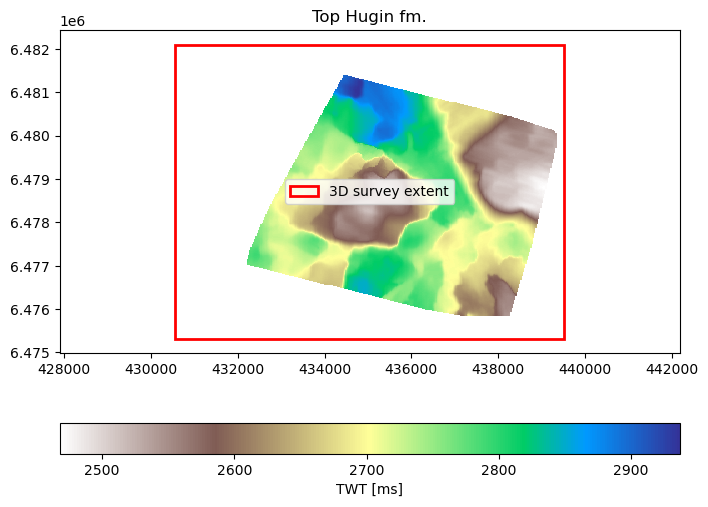

In [68]:
from matplotlib.patches import Polygon

survey_limits = Polygon(
    corners, fill=False, edgecolor="r", linewidth=2, label="3D survey extent"
)

f, ax = plt.subplots(figsize=(8, 6))
pp = ax.pcolormesh(X, Y, Z, cmap="terrain_r")
f.colorbar(pp, orientation="horizontal", label="TWT [ms]")
ax.add_patch(survey_limits)
ax.axis("equal")
ax.legend()
ax.set_title("Top Hugin fm.")

In [16]:
# This way only loads 'nan' values to horizon
# heimdal_ds = vol.seis.surface_from_points(df, 'twt', right=('iline', 'xline'))
# heimdal_ds

# This way loads the values
df_idx = df.set_index(["iline", "xline"])
heimdal_ds = df_idx.to_xarray()
heimdal_ds

<xarray.Dataset> Size: 105kB
Dimensions:  (iline: 51, xline: 251)
Coordinates:
  * iline    (iline) int64 408B 1300 1304 1308 1312 1316 ... 1488 1492 1496 1500
  * xline    (xline) int64 2kB 1500 1502 1504 1506 1508 ... 1994 1996 1998 2000
Data variables:
    twt      (iline, xline) float64 102kB 2.085e+03 2.085e+03 ... 2.127e+03

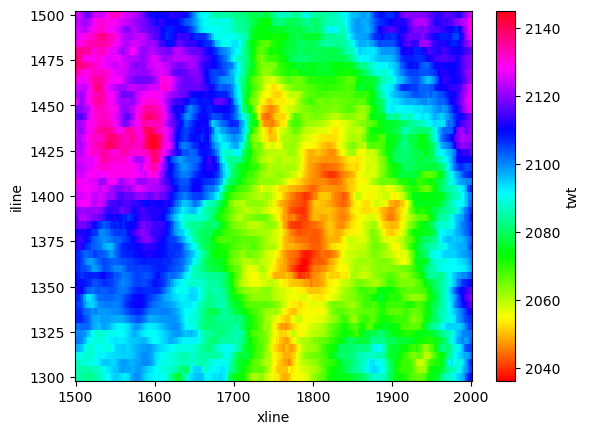

In [17]:
# Plotting from the ".ds" produces filled in grid, ie no gaps at iline 1300, 1302, 1304, etc
heimdal_ds.twt.plot(cmap='hsv')

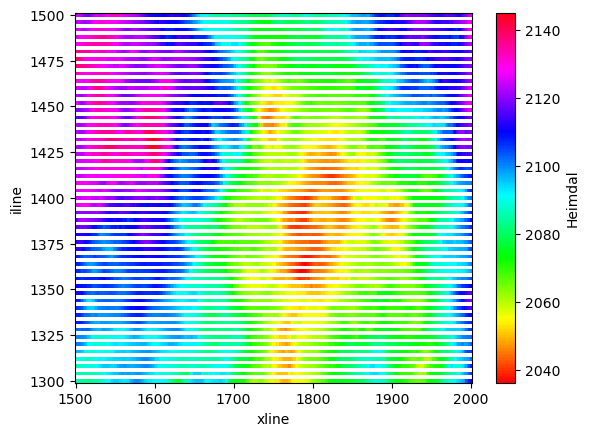

In [18]:
vol["Heimdal"] = heimdal_ds.twt
# vol

# Horizon data is every 4th iline, and seismic is every 2nd iline
# Plotting this way leaves Iline gaps - ie at 1302, 1306, 1310, etc
vol.Heimdal.plot(cmap='hsv')

In [45]:
# # AttributeError: 'Dataset' object has no attribute 'cdp_x'

# axs = plt.subplot()
# mesh = axs.pcolormesh(
#     heimdal_ds.cdp_x.values,
#     heimdal_ds.cdp_y.values,
#     heimdal_ds.twt.values,
#     shading="auto")
# axs.set_aspect(1)
# _ = plt.colorbar(mesh, orientation="horizontal")

/var/folders/6n/1q5tw76s26d681wk41cg18pc0000gn/T/ipykernel_23711/1942777799.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = axs.pcolormesh(


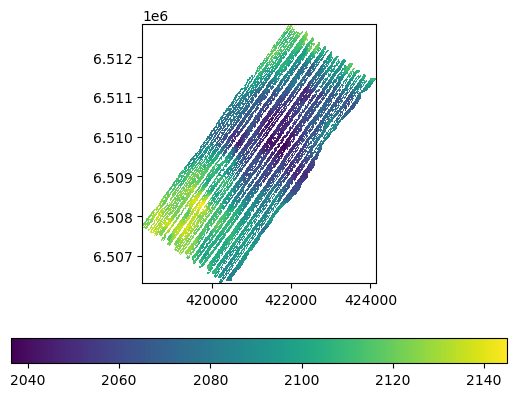

In [21]:
axs = plt.subplot()
mesh = axs.pcolormesh(
    vol.cdp_x.values,
    vol.cdp_y.values,
    vol.Heimdal.values,
    shading="auto")
axs.set_aspect(1)
_ = plt.colorbar(mesh, orientation="horizontal")

In [46]:
# tform = vol.seis.get_affine_transform()  # ValueError:  ????

# axs = plt.subplot()
# mesh = axs.pcolormesh(
#     heimdal_ds.iline,
#     heimdal_ds.xline,
#     heimdal_ds.twt.T,
#     shading="auto",
#     transform=tform + axs.transData
# )
# axs.set_aspect(1)
# _ = axs.plot([1300, 1500], [1500, 2000], transform=tform + axs.transData, color="w")

In [ ]:
cp = vol.segysak.calc_corner_points()
corners = np.array(cp)
corners

cdp_x_min = vol.cdp_x.values.min()
cdp_x_max = vol.cdp_x.values.max()
cdp_y_min = vol.cdp_y.values.min()
cdp_y_max = vol.cdp_y.values.max()

# np.linspace(418258, 424063, 250)
# print(cdp_x_min, cdp_x_max, cdp_y_min, cdp_y_max)

In [47]:
# from scipy.interpolate import griddata

# # ValueError: Input points array must have 2 dimensions.
# xi = np.linspace(cdp_x_min, cdp_x_max, 250)
# yi = np.linspace(cdp_y_min, cdp_y_max, 250)
# X, Y = np.meshgrid(xi, yi)
# Z = griddata((vol.cdp_x, vol.cdp_y), vol.Heimdal, (X, Y), rescale=True)

In [ ]:
# from matplotlib.patches import Polygon

# survey_limits = Polygon(
#     corners, fill=False, edgecolor="r", linewidth=2, label="3D survey extent"
# )

# f, ax = plt.subplots(figsize=(8, 6))
# pp = ax.pcolormesh(X, Y, Z, cmap="terrain_r")
# f.colorbar(pp, orientation="horizontal", label="TWT [ms]")
# ax.add_patch(survey_limits)
# ax.axis("equal")
# ax.legend()
# ax.set_title("Top Hugin fm.")

In [ ]:
envelope = bg.attribute.envelope(vol.nears)
phase = bg.attribute.instantaneous_phase(vol.nears)
energy = bg.attribute.energy(vol.nears, duration=0.016, dt=0.004)
instamp = bg.attribute.complex.instantaneous_amplitude(vol.nears)
quad = bg.attribute.complex.quadrature(vol.nears)
refstr = bg.attribute.complex.reflection_strength(vol.nears)

In [ ]:
#freq = bg.attribute.instantaneous_frequency(vol.nears, dt=0.004)#, kind='so', percentile_clip=99) 
#ValueError: operands could not be broadcast together with shapes (99,251,250) (100,251,250)

In [ ]:
#specd = bg.attribute.spectraldecomp(vol.nears)
#ValueError: operands could not be broadcast together with shapes (32,) (32,250) 

In [ ]:
print(envelope.shape)
print(phase.shape)
print(energy.shape)
print(instamp.shape)
print(quad.shape)
print(refstr.shape)
#print(freq.shape)
#print(specd.shape)

In [ ]:
ilines = np.arange(1300, 1501, 2)
xlines = np.arange(1500, 2001, 2)
samples = np.arange(1500, 2500, 4)

In [ ]:
ds_env = xr.Dataset(
    {
        "envelope": (("iline", "xline", "samples"), envelope)
    },
    coords={
        "iline" : ilines,
        "xline" : xlines,
        "samples" : samples
    }
)

# ds_env

In [ ]:
ds_phase = xr.Dataset(
    {
        "phase": (("iline", "xline", "samples"), phase)
    },
    coords={
        "iline" : ilines,
        "xline" : xlines,
        "samples" : samples
    }
)

# ds_phase

In [ ]:
# ds_freq = xr.Dataset(
#     {
#         "InstFreq": (("iline", "xline", "samples"), freq)
#     },
#     coords={
#         "iline" : ilines,
#         "xline" : xlines,
#         "samples" : samples
#     }
# )

In [ ]:
ds_energy = xr.Dataset(
    {
        "energy": (("iline", "xline", "samples"), energy)
    },
    coords={
        "iline" : ilines,
        "xline" : xlines,
        "samples" : samples
    }
)

In [ ]:
ds_instamp = xr.Dataset(
    {
        "instamp": (("iline", "xline", "samples"), instamp)
    },
    coords={
        "iline" : ilines,
        "xline" : xlines,
        "samples" : samples
    }
)

In [ ]:
ds_quad = xr.Dataset(
    {
        "quad": (("iline", "xline", "samples"), quad)
    },
    coords={
        "iline" : ilines,
        "xline" : xlines,
        "samples" : samples
    }
)

In [ ]:
ds_refstr = xr.Dataset(
    {
        "refstr": (("iline", "xline", "samples"), refstr)
    },
    coords={
        "iline" : ilines,
        "xline" : xlines,
        "samples" : samples
    }
)

In [ ]:
vol["Envelope"] = ds_env.envelope
vol["Phase"] = ds_phase.phase
vol["Energy"] = ds_energy.energy
vol["InstAmp"] = ds_instamp.instamp
vol["Quadrature"] = ds_quad.quad
vol["RefStr"] = ds_refstr.refstr
# vol["InstFreq"] = ds_freq.freq

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(15, 8))
iline_sel = 1400
vol.nears.transpose("samples", "iline", "xline", transpose_coords=True).sel(
    iline=iline_sel
).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("XLINE")

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(15, 8))
iline_sel = 1400
vol.fars.transpose("samples", "iline", "xline", transpose_coords=True).sel(
    iline=iline_sel
).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("XLINE")

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(15, 8))
iline_sel = 1400
vol["(F-N)F"].transpose("samples", "iline", "xline", transpose_coords=True).sel(
    iline=iline_sel
).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("XLINE")

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(15, 8))
iline_sel = 1400
vol.Envelope.transpose("samples", "iline", "xline", transpose_coords=True).sel(
    iline=iline_sel
).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("XLINE")

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(15, 8))
iline_sel = 1400
vol.Phase.transpose("samples", "iline", "xline", transpose_coords=True).sel(
    iline=iline_sel
).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("XLINE")

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(15, 8))
iline_sel = 1400
vol.Energy.transpose("samples", "iline", "xline", transpose_coords=True).sel(
    iline=iline_sel
).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("XLINE")

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(15, 8))
iline_sel = 1400
vol.InstAmp.transpose("samples", "iline", "xline", transpose_coords=True).sel(
    iline=iline_sel
).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("XLINE")

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(15, 8))
iline_sel = 1400
vol.RefStr.transpose("samples", "iline", "xline", transpose_coords=True).sel(
    iline=iline_sel
).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("XLINE")

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(15, 8))
iline_sel = 1400
vol.InstAmp.transpose("samples", "iline", "xline", transpose_coords=True).sel(
    iline=iline_sel
).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("XLINE")

In [ ]:
time_sel = 550
fig, ax1 = plt.subplots(ncols=1, figsize=(15, 8))
vol.nears.sel(samples=time_sel, method="nearest").plot(cmap="seismic_r")
plt.title(f"Time slice at {time_sel} ms")
plt.grid(True)
plt.xlabel("XLINE")
plt.ylabel("ILINE")

In [ ]:
time_sel = 550
fig, ax1 = plt.subplots(ncols=1, figsize=(15, 8))
vol.fars.sel(samples=time_sel, method="nearest").plot(cmap="seismic_r")
plt.title(f"Time slice at {time_sel} ms")
plt.grid(True)
plt.xlabel("XLINE")
plt.ylabel("ILINE")

In [ ]:
# see 1:33:45 - Horizon flattening
vol["trace"] = (("iline", "xline"), np.arange(101*251, dtype=int).reshape(101, 251))
# vol

# vol.trace

Near and far offset partial stacks: subcubes from full 3-d cubes.
segy format

* inline: 1300-1500, every 2
* xline: 1500-2000, every 2
* time: 1500-2500 ms
* total 25351 traces for each subcube.

* xline number stored in bytes 21-26.
* inline number (multiplied by 1000) stored in bytes 41-44.

In [ ]:
# Vectorise for machine learning 
vol_df = vol.isel(iline=10).to_dataframe()
vol_df

vol_df_reindex = vol_df.reset_index()
vol_df_reindex

vol_df_multi = vol_df_reindex.set_index(["iline", "xline", "twt"])
vol_df_multi

vol_xr = vol_df_multi.to_xarray()
vol_xr

# attributes will be lost when coming back to xarray
vol_xr.attrs

vol_xr.attrs = vol.attrs
vol_xr.attrs

# cdp_x and cdp_y were broadcast to 3D.  Now collapse back to 2 dimensions
vol_xr["cdp_x"] = vol_xr["cdp_x"].mean(dim=["twt"])
vol_xr["cdp_y"] = vol_xr["cdp_y"].mean(dim=["twt"])
vol_xr = vol_xr.set_coords(["cdp_x", "cdp_y"])

vol_xr